# SALES PREDICTION USING SCI-KIT LEARN

### Problem Statement
We are to build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
The advertising dataset from Industries.Co will be used to analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable

### Importing Required libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

### Loading the Dataset

In [37]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Inspecting the Dataset

In [38]:
data.shape

(200, 4)

In [39]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [40]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [41]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

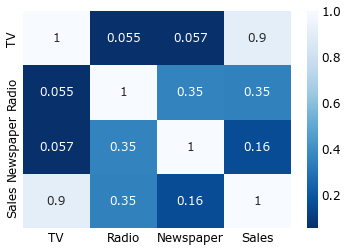

In [42]:
import seaborn as sns
sns.heatmap(data.corr(), cmap='Blues_r', annot=True)

### Data Visualization

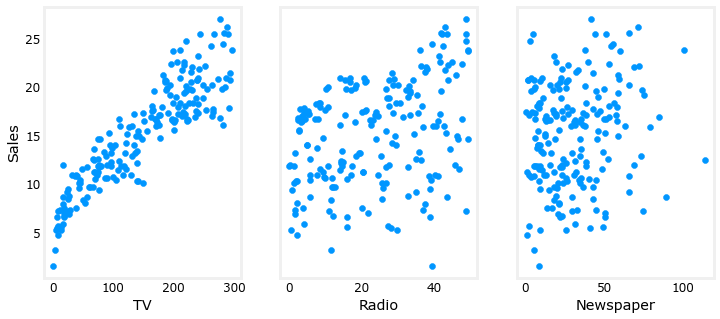

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Sales")
plt.show()

### Creating the feature and target variables

In [48]:
X_train = data.iloc[:, :3]
y_train = data.iloc[:, 3]
X_train = X_train.values
y_train = y_train.values
X_features = ['TV', 'Radio', 'Newspaper']

In [51]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw\nX: {np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw
X: [295.7  49.6 113.7]
Peak to Peak range by column in Normalized X: [3.45 3.35 5.23]


### Scale/normalize the training data

In [53]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw\nX: {np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw
X: [295.7  49.6 113.7]
Peak to Peak range by column in Normalized X: [3.45 3.35 5.23]


### Create and fit the regression model

In [54]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 22, number of weight updates: 4401.0


### Setting the Parameters w(weights) and b(bias)
Note, the parameters are associated with the *normalized* input data.

In [55]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters using gradient descent: w: [4.66 1.58 0.01], b: 15.13")

model parameters:                   w: [4.65 1.58 0.01], b:[15.12]
model parameters using gradient descent: w: [4.66 1.58 0.01], b: 15.13


### Making predictions
Predict the targets of the training data. I used both the `predict` routine and compute using $w$ and $b$.

In [56]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:5]}" )
print(f"Target values \n{y_train[:5]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[21.21 11.27 10.5  17.3  15.64]
Target values 
[22.1 10.4 12.  16.5 17.9]


### Plotting predictions and targets vs original features

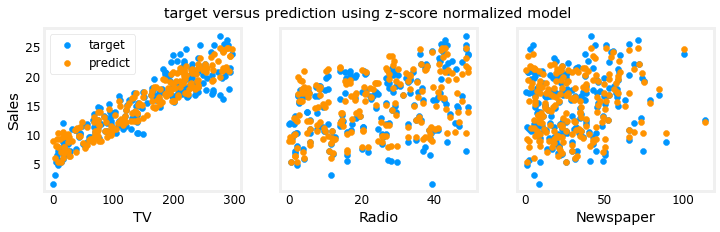

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred, color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Sales")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()